## Homework 3

### Statement of Non-cheating and honest collaboration:

I have been informed of the academic honesty policies of Georgia State University. I will abide by those policies. I have written up the solutions below by myself and understand what I have turned in. I collaborated and discussed the problems with the following people: ```Paige```

Signed,
```Jesse Annan```

__Please change the notebook's name and add your name before submitting.__

### Part I - Visual Data Analytics (50 pts)

In this part, you are given a seed characteristics dataset. The dataset file is slightly modified and included in the zip file for easier reading (please put it in the same directory as this notebook file). The dataset includes measurements of geometrical properties of kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian (which are represented with group feature). For each group you have 70 instances each. You can find the information about the dataset (here)[info about the dataset https://archive.ics.uci.edu/ml/datasets/seeds ]. Answer the seven questions provided below. Provide your remarks as comments.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kerneldata = pd.read_csv('./seeds_dataset.csv', sep='\t') # info about the dataset https://archive.ics.uci.edu/ml/datasets/seeds
kerneldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   kernel_length         210 non-null    float64
 4   kernel_width          210 non-null    float64
 5   asymmetry_coef        210 non-null    float64
 6   kernel_groove_length  210 non-null    float64
 7   group                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [3]:
kerneldata.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,group
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
# changing coded wheat kernel, "group" to actual wheat kernel name
group_name = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}
kerneldata['group_name'] = kerneldata['group'].map(group_name)
kerneldata.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,group,group_name
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama


#### Q-1 [6 pts] -- How do the different attributes of wheat vary with respect to each other? What are your inferences?

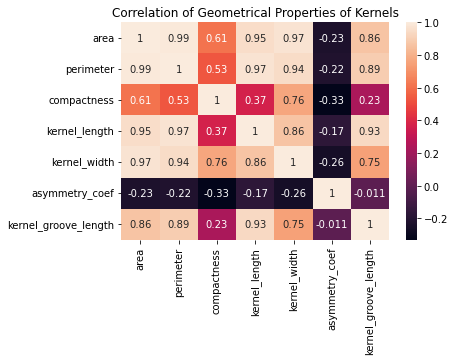

In [5]:
attributes = ['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asymmetry_coef', 'kernel_groove_length']

sns.heatmap(kerneldata.loc[:,attributes].corr(), annot=True)
plt.title('Correlation of Geometrical Properties of Kernels')
None

##### [Q-1] Remark 
Correlation between attributes show the linear relation between variables. From the correlaton heatmap above as attribute `perimeter` increases (or decreases) `kernel length, kerel width,` and `kernel grove length` increases (or decreases) as well. Also attribute `asymmetry coef` has a very low negative linear realtion with other attrubutes. This signifies that, an increase in `asymmetry coef` tend to cause a reduction in other kernel attributes. 

#### Q-2 [7 pts] -- Compare the distribution of area of kernels among different varieties of wheat and identify which variety has the largest spread in terms of area of kernels and comment on the distibution.

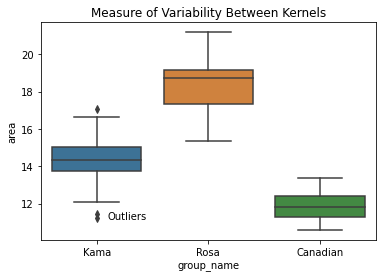

In [6]:
sns.boxplot(x=kerneldata['group_name'], y=kerneldata['area'], saturation=0.6)
plt.text(0.1, 11.15, 'Outliers')
plt.title('Measure of Variability Between Kernels')
plt.show()

In [7]:
def iqr(attribute):
    iqr = attribute.quantile(.75) - attribute.quantile(.25)
    return iqr

# Measure of spread of each kernel, IQR
kerneldata['area'].groupby(kerneldata['group_name']).agg(iqr)

group_name
Canadian    1.1625
Kama        1.2950
Rosa        1.8075
Name: area, dtype: float64

##### [Q-2] Remark
From the box plot and IQR, we can conclude that Rosa is the largest type of wheat kernel with a spread of 1.8075, and the Canadian variety is the smallest with a spread of 1.1625 while Kama is in-between with iqr 1.2950. Finally, there seems to be a few outliers in the Kama kernel's area.

#### Q3 [6 pts] -- Create a boxplot for asymmetry_coef parameter. 
However, to depict the potential outliers clearly, instead of using (Q1-1.5IQR, Q3+1.5IQR) use only top 5% (interval of 0 to 95 percentile) for placing your whiskers. Identify the potential outlying points thresholds for each group for asymmetry_coef parameter.

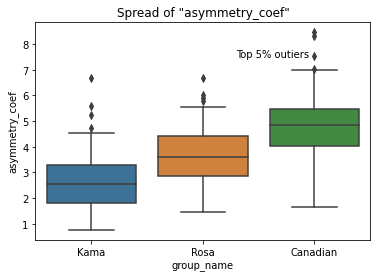

In [8]:
sns.boxplot(data=kerneldata, x=kerneldata['group_name'], y=kerneldata['asymmetry_coef'], whis=[0, 95], saturation=0.6)
plt.title('Spread of "asymmetry_coef"')
plt.text(1.3, 7.5, 'Top 5% outiers')
plt.show()

#### Q-4 [7 pts] -- Compare the distribution of the perimeter of the kernel among different varieties of wheat, taking into account both the shape and spread of the data. What can you infer about the relationship between the perimeter of the kernel and the variety of wheat?

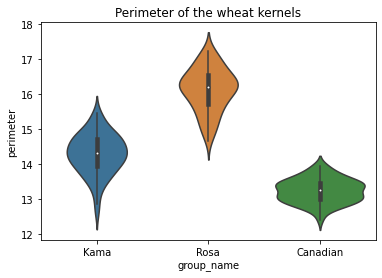

In [9]:
sns.violinplot(data=kerneldata, x=kerneldata['group_name'], y=kerneldata['perimeter'], saturation=0.6)
plt.title('Perimeter of the wheat kernels')
plt.show()

##### [Q-4] Remark
The violin plot shows the relationship of wheat kernels and their perimeter. The shape of each plot show that most of the perimeters of the kernels are highly concentrated around the median of each kernel.

#### Q-5 [8 pts] -- Compare the relationship between the compactness of the kernel and the asymmetry coefficient for different varieties of wheat. Are there any patterns or outliers in the data that stand out?

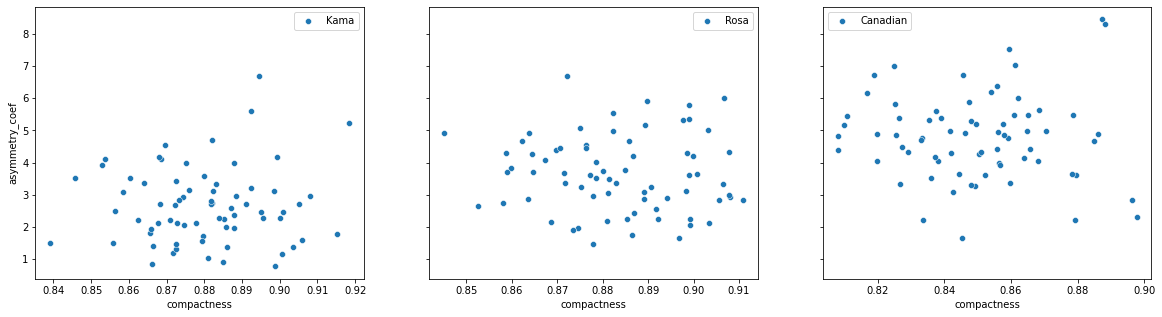

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(20,5), sharey=True)

#Kama wheat kernel
kamadf = kerneldata[kerneldata['group'] == 1]
sns.scatterplot(ax=ax[0], data=kamadf, x=kamadf['compactness'], y=kamadf['asymmetry_coef'], label='Kama')

#Rosa wheat kernel
rosadf = kerneldata[kerneldata['group'] == 2]
sns.scatterplot(ax=ax[1], data=rosadf, x=rosadf['compactness'], y=rosadf['asymmetry_coef'], label='Rosa')

#Canadian wheat kernel
candf = kerneldata[kerneldata['group'] == 3]
sns.scatterplot(ax=ax[2], data=candf, x=candf['compactness'], y=candf['asymmetry_coef'], label='Canadian')

plt.legend()
plt.show()

##### [Q-5] Remark
The scatter plot shows a very weak, linear association between kernel compactness and kernel asymmetry coefficient. Also, there appear to be few outliers in each plot.

#### Q6 [8 pts] -- Analyze the relationship between kernel length and kernel width parameter. 
Create a scatter plot (use length and width values for x and y axis), use different colors for instances from different groups. 

What can you say about the relationship amoung kernel length, kernel width and group features. 

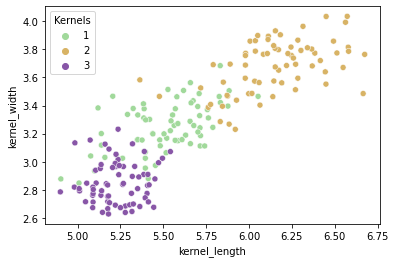

In [11]:
sns.scatterplot(data=kerneldata, x=kerneldata['kernel_length'], y=kerneldata['kernel_width'],
                hue=kerneldata['group'], palette=['#a1d99b', '#d8b365', '#8856a7'])
plt.legend(title='Kernels')
plt.show()

##### [Q-6] Remark
The scatter plot shows a strong, positive, linear association between kernel length and kernel width of each wheat kernel. There don't appear to be any extreme outliers in the data.

#### Q7 [8 pts] -- Create an equi-frequency histogram plot for 'perimeter' feature using 20 bins. 
Make sure you display the density values and not counts. How is the 'perimeter' feature's values are distributed in this dataset? Identify a candidate probability distribution.

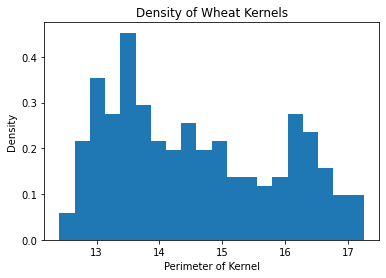

In [12]:
plt.hist(kerneldata['perimeter'], bins=20, density= True)
plt.ylabel('Density')
plt.xlabel('Perimeter of Kernel')
plt.title('Density of Wheat Kernels')
plt.show()


##### [Q-7] Remark
The histogram shows a bimodal distribution and it is left skewed. 

### Part II - Analyzing Boosting Tree Ensembles (30 pts)

Boosting is a type of ensemble methods that combines the predictions from many base (or weak) learners sequentially. A base learner in this case is often a simple model (in our case, a decision tree classifiers). Adaptive Boosting (AdaBoost) algorithm is one of the well-known boosting methods, which involves using relatively small trees sequentially trained. Consecutive models attempt to refine and correct the predictions made by the previous model by weighing the training dataset and assigning more importance on training instances which the prior model made prediction errors.

You will again use the seeds dataset from Part I. Please read it again using the following code snippet and answer the questions.

In [13]:
kerneldata.drop(axis=1, columns=['group_name'], inplace=True)
kerneldata.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,group
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


#### Q1 [5 pts] - Create training and testing datasets.
Use the DataFrame created above from `seeds` dataset. You can use `train_test_split` from `sklearn.model_selection`.  The `random_state` parameter in `train_test_split` should be set to your panther id number's last two digits and the training set should have 3 times more instances than the testing set (i.e., 75%-25% split).

In [14]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

X = kerneldata[attributes]
y = kerneldata['group']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=11)

#### Q2 [15 pts] - Training and testing a simple decision tree model
Using sklearn's decision tree classifier (`DecisionTreeClassifier`), initialize a tree-based classification model. Set the max_depth to 2. Then, train and test the error rate of your classifier. Also, include the confusion matrix and the error rate for your classifier.

In [15]:
# training decision tree model
dtree = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
dtree = dtree.fit(X_train, y_train)
y_predict = dtree.predict(X_test)

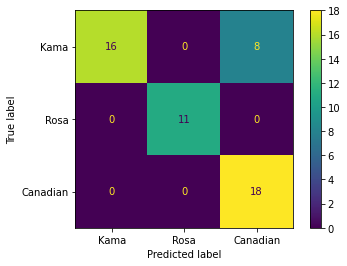

In [16]:
# confusion matrix
conf_metrix = metrics.confusion_matrix(y_test, y_predict)
conf_metrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_metrix,
                                                    display_labels=['Kama', 'Rosa', 'Canadian'])
conf_metrix_display.plot()
plt.show()

In [17]:
# accuracy and error rate
accuracy = metrics.accuracy_score(y_test, y_predict)
error_rate = 1 - accuracy
print(f'Decision Tree Accuracy = {accuracy*100:.2f} % \nError Rate of Decision Tree = {error_rate*100:.2f} %')

Decision Tree Accuracy = 84.91 % 
Error Rate of Decision Tree = 15.09 %


#### Q3 [10 pts] - Visualize the trained decision tree and interpret the feature importance
Visualize the decision tree and identify the most informative feature in your training set (with the highest information gain). 

[Text(0.5, 0.8333333333333334, 'kernel_groove_length <= 5.573\nentropy = 1.578\nsamples = 157\nvalue = [46, 59, 52]\nclass = Rosa'),
 Text(0.25, 0.5, 'area <= 13.455\nentropy = 1.119\nsamples = 99\nvalue = [45, 2, 52]\nclass = Canadian'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.525\nsamples = 59\nvalue = [7, 0, 52]\nclass = Canadian'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.286\nsamples = 40\nvalue = [38, 2, 0]\nclass = Kama'),
 Text(0.75, 0.5, 'asymmetry_coef <= 2.054\nentropy = 0.126\nsamples = 58\nvalue = [1, 57, 0]\nclass = Rosa'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.65\nsamples = 6\nvalue = [1, 5, 0]\nclass = Rosa'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 52\nvalue = [0, 52, 0]\nclass = Rosa')]

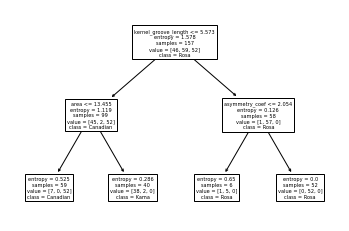

In [18]:
tree.plot_tree(dtree, feature_names=attributes, class_names=list(group_name.values()))